# Convert Dataset into same image format

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os
import glob
import numpy as np
from PIL import Image

In [ ]:
dataset_path = '/content/drive/MyDrive/1 - Matrikulasi Pemrograman Python/dataset_original'
dataset_path_label = glob.glob(dataset_path + "/*")

# Gather All Image Path and load
images = []
labels = []
labels_name = []
for idx, label_path in enumerate(dataset_path_label):
    temp_label_img_paths = glob.glob(label_path + "/*")
    label_relative_path = label_path.split("/")[-1]
    labels_name.append(label_relative_path)
    print(label_relative_path)
    for idx2, img_path, in enumerate(temp_label_img_paths):
        # Check Extension avoid non image file
        extension = img_path.split("/")[-1].split(".")[-1]
        if extension == "jpg" or extension == "jfif":
            # Load and resize
            temp = cv2.imread(img_path)
            images.append(temp)
            labels.append(idx)
        if extension == 'png':
            temp = Image.open(img_path)
            temp = temp.convert("RGB")
            temp = np.array(temp)
            images.append(temp)
            labels.append(idx)

tangkuban_perahu
air_terjun_tirtosari
bamburuncing
benteng_belgica
tebing_hatupia
jembatan_repo
gunung_bromo
peta
monas
tanah_lot
monkasel
simpang_lima_gumul
tugu_pahlawan
gunung_slamet
masjid_agung_surabaya
panca_benua
pantai_ora
jamgadang
danau_toba
buddha_tidur
kawah_ijen
pagoda_tian_ti
monjali
monjaya
pantai_papuma
bukit_jamur
bukit_jaddih
benteng_rotterdam
danau_laguna
masjid_baiturrahman


In [ ]:
save_path = '/content/converted_jpg'

# Saving back the data into jpg format
for idx, label in enumerate(labels):
    # Create dir based on label
    base_save_path = os.path.join(save_path, labels_name[label])
    if not os.path.exists(base_save_path):
        os.makedirs(base_save_path)

    # Manage saving path
    path_name = "{}_{}.{}".format(str(idx), labels_name[label], "jpg")
    saving_path = os.path.join(base_save_path, path_name)
    print(saving_path)

    # Saving
    cv2.imwrite(saving_path, images[idx])

/content/converted_jpg/tangkuban_perahu/0_tangkuban_perahu.jpg
/content/converted_jpg/tangkuban_perahu/1_tangkuban_perahu.jpg
/content/converted_jpg/tangkuban_perahu/2_tangkuban_perahu.jpg
/content/converted_jpg/tangkuban_perahu/3_tangkuban_perahu.jpg
/content/converted_jpg/tangkuban_perahu/4_tangkuban_perahu.jpg
/content/converted_jpg/tangkuban_perahu/5_tangkuban_perahu.jpg
/content/converted_jpg/tangkuban_perahu/6_tangkuban_perahu.jpg
/content/converted_jpg/tangkuban_perahu/7_tangkuban_perahu.jpg
/content/converted_jpg/tangkuban_perahu/8_tangkuban_perahu.jpg
/content/converted_jpg/tangkuban_perahu/9_tangkuban_perahu.jpg
/content/converted_jpg/tangkuban_perahu/10_tangkuban_perahu.jpg
/content/converted_jpg/tangkuban_perahu/11_tangkuban_perahu.jpg
/content/converted_jpg/tangkuban_perahu/12_tangkuban_perahu.jpg
/content/converted_jpg/tangkuban_perahu/13_tangkuban_perahu.jpg
/content/converted_jpg/tangkuban_perahu/14_tangkuban_perahu.jpg
/content/converted_jpg/tangkuban_perahu/15_tangkub

# Save image into Numpy Format

In [ ]:
import cv2
import os
import numpy as np
import glob
from PIL import Image

In [ ]:
# Extract labels and main directory for each labels
dataset_path = "/content/converted_jpg"
labels_path = glob.glob(dataset_path + "/*")
labels = [x.split("/")[-1] for x in labels_path]

In [ ]:
import json

# Format label and encode
labels_dict = {}
for idx, label in enumerate(labels):
    labels_dict[label] = idx

# Save to json
json = json.dumps(labels_dict)
f = open("/content/label_encode.json","w")
f.write(json)
f.close()

In [ ]:
# Aliasing function
def anti_aliasing(img):
    pil_img = Image.fromarray(img)
    pil_img = pil_img.resize((256, 256), resample=Image.ANTIALIAS)

    return np.asarray(pil_img)

In [ ]:
# Load images path with the label in encoded format then resize to 256x256 and anti alliasing
images = []
targets = []

# Loop through label path
for idx_label_path, label_path in enumerate(labels_path):
    images_path = glob.glob(label_path + "/*")
    # Loop through image path
    for idx_image_path, image_path in enumerate(images_path):
        try:
            # Image preprocessing
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = anti_aliasing(img)
            images.append(img)

            # Target each image
            targets.append(labels_dict[labels[idx_label_path]])
        except:
            print(image_path)

<ipython-input-8-144385ec28e9>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  pil_img = pil_img.resize((256, 256), resample=Image.ANTIALIAS)


In [ ]:
import matplotlib.pyplot as plt

# Sample

#plt.imshow(images[0])
#print("Label/Target is {} - {}".format(str(targets[0]), labels[targets[0]]))

In [ ]:
# Calculate ratio each classes
from collections import Counter

counter = Counter(targets)
for k, v in counter.items():
    per= v / len(targets) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=98 (2.411%)
Class=1, n=135 (3.322%)
Class=2, n=178 (4.380%)
Class=3, n=148 (3.642%)
Class=4, n=98 (2.411%)
Class=5, n=104 (2.559%)
Class=6, n=169 (4.158%)
Class=7, n=130 (3.199%)
Class=8, n=125 (3.076%)
Class=9, n=98 (2.411%)
Class=10, n=107 (2.633%)
Class=11, n=179 (4.405%)
Class=12, n=149 (3.666%)
Class=13, n=130 (3.199%)
Class=14, n=147 (3.617%)
Class=15, n=132 (3.248%)
Class=16, n=145 (3.568%)
Class=17, n=150 (3.691%)
Class=18, n=141 (3.469%)
Class=19, n=188 (4.626%)
Class=20, n=139 (3.420%)
Class=21, n=150 (3.691%)
Class=22, n=109 (2.682%)
Class=23, n=122 (3.002%)
Class=24, n=127 (3.125%)
Class=25, n=160 (3.937%)
Class=26, n=135 (3.322%)
Class=27, n=169 (4.158%)
Class=28, n=107 (2.633%)
Class=29, n=95 (2.338%)


In [ ]:
# to numpy
images = np.asarray(images)
targets = np.asarray(targets)

In [ ]:
# Save to npz
save_dir = '/content/drive/MyDrive/1 - Matrikulasi Pemrograman Python/'
np.savez(save_dir + "dataset.npz", x=images, y=targets)

# Data Augmentation

In [ ]:
import cv2
import os
import numpy as np
import glob
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold as kf
from PIL import Image

In [ ]:
# Load Image which saved in .npz files
save_dir = '/content/drive/MyDrive/1 - Matrikulasi Pemrograman Python/'
dataset_path = save_dir + "dataset.npz"
data = np.load(dataset_path)

x = data['x']
y = data['y']

In [ ]:
# Cross Validation
kf_model = kf(n_splits=5, random_state=10, shuffle=True)
for train_idx, test_idx in kf_model.split(x, y):
    x_train, y_train = x[train_idx] , y[train_idx]
    x_test, y_test = x[test_idx] , y[test_idx]

In [ ]:
# Calculate ratio each classes
# Gather data state for further augmentation
from collections import Counter

augmentation_target = 2000
num_classes = 0
ns = []

counter = Counter(y_train)
for k, v in counter.items():
    per= v / len(y) * 100
    ns.append(v)
    num_classes = num_classes + 1
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

del x

Class=0, n=76 (1.870%)
Class=1, n=111 (2.731%)
Class=2, n=139 (3.420%)
Class=3, n=119 (2.928%)
Class=4, n=76 (1.870%)
Class=5, n=87 (2.141%)
Class=6, n=141 (3.469%)
Class=7, n=113 (2.781%)
Class=8, n=100 (2.461%)
Class=9, n=78 (1.919%)
Class=10, n=76 (1.870%)
Class=11, n=132 (3.248%)
Class=12, n=118 (2.904%)
Class=13, n=112 (2.756%)
Class=14, n=119 (2.928%)
Class=15, n=102 (2.510%)
Class=16, n=117 (2.879%)
Class=17, n=114 (2.805%)
Class=18, n=121 (2.977%)
Class=19, n=147 (3.617%)
Class=20, n=106 (2.608%)
Class=21, n=121 (2.977%)
Class=22, n=86 (2.116%)
Class=23, n=105 (2.584%)
Class=24, n=106 (2.608%)
Class=25, n=119 (2.928%)
Class=26, n=110 (2.707%)
Class=27, n=139 (3.420%)
Class=28, n=87 (2.141%)
Class=29, n=75 (1.845%)


In [ ]:
# Gather difference between each classes ratio for augmentation combination
required_combination = []

for idx, n in enumerate(ns):
    required_combination.append(augmentation_target // n)

required_combination

[26,
 18,
 14,
 16,
 26,
 22,
 14,
 17,
 20,
 25,
 26,
 15,
 16,
 17,
 16,
 19,
 17,
 17,
 16,
 13,
 18,
 16,
 23,
 19,
 18,
 16,
 18,
 14,
 22,
 26]

<b>Augmentation Combination</b>

First Group

0. None
1. Horizontal Flip
2. Gausian Blur
3. Gausian Noise
4. Speckle Noise

Second Group

0. None
1. Contrast
2. Brightness
3. Hue
4. Saturation
5. Exposure

Possible Combination is 25

In [ ]:
import random

def generate_random_combination(n_combination=2):
    combination = []

    itr = 0
    # Looping to generate n combination
    # Only possible for 11 combination, if 11 combination has been fulfilled, loop may go infinity
    while itr < n_combination:
        # Generate within range 0f 0-3 and 0-2
        temp = [random.randrange(0, 5), random.randrange(0, 6)]

        # Avoid combination [0, 0]
        if temp == [0, 0]:
            continue

        # Assign for first iteration
        if itr == 0:
            combination.append(temp)
            itr += 1

        # Assign for second and later iteration
        if itr != 0:
            # Gather Information upwards/backward of array
            isTheSame = False
            for data in combination:
                if data == temp:
                    isTheSame = True
                    break

            # if no similiarity to backward array temp succesfully added
            if isTheSame == False:
                combination.append(temp)
                itr += 1
            else:
                continue

    return np.asarray(combination)

In [ ]:
# Augmentation Action
def brightness(img, brightness=255):
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow
        buf = cv2.addWeighted(img, alpha_b, img, 0, gamma_b)
    else:
        buf = img.copy()

    return buf

def contrast(img, alpha=1.5, beta=20):
    return cv2.addWeighted(img, alpha, np.zeros(img.shape, img.dtype), 0, beta)

def gaussian_noise(img, intensity=0.5):
    gauss = np.random.normal(0,intensity,img.size)
    gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
    noise = np.add(img, gauss)

    return noise

def speckle_noise(img, intensity=0.5):
    gauss = np.random.normal(0,intensity,img.size)
    gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
    noise = img + img * gauss

    return noise

def hue_shift(image, degree_shift=180):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    shift_h = (h + 90) % degree_shift
    shift_hsv = cv2.merge([shift_h, s, v])

    return cv2.cvtColor(shift_hsv, cv2.COLOR_HSV2RGB)

def saturation(image, saturation=10, scale=1):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    apply_s = (s * scale) + saturation
    apply_hsv = cv2.merge([h, apply_s, v])

    return cv2.cvtColor(apply_hsv, cv2.COLOR_HSV2RGB)

def exposure_fusion(img):
    exposure = [
        brightness(img, brightness=-50),
        brightness(img, brightness=-30),
        brightness(img, brightness=30),
        brightness(img, brightness=50)
    ]

    # Align image
    alligned = cv2.createAlignMTB()
    alligned.process(exposure, exposure)

    # Merge image
    merged = cv2.createMergeMertens()
    exposureFusion = merged.process(exposure)

    #info = np.iinfo(exposureFusion.dtype)
    #data = data.astype(np.float32) / info.max
    data = 255 * exposureFusion
    img = data.astype(np.uint8)

    return img

In [ ]:
# Augmentation Function Handler
def augmentation_handler(img, path, combination=[1, 1]):
    def first_group(img, num):
        if num == 0:
            return img
        if num == 1:
            return cv2.flip(img, 1)
        if num == 2:
            return cv2.GaussianBlur(img,(3,3),cv2.BORDER_DEFAULT)
        if num == 3:
            return gaussian_noise(img, intensity=0.5)
        if num == 4:
            return speckle_noise(img, intensity=0.5)
    def second_group(img, num):
        if num == 0:
            return img
        if num == 1:
            return contrast(img, alpha=1.1, beta=15)
        if num == 2:
            return brightness(img, brightness=50)
        if num == 3:
            return hue_shift(img, degree_shift=120)
        if num == 4:
            return saturation(img, saturation=15, scale=2)
        if num == 5:
            return exposure_fusion(img)

    first_result  = first_group(img, combination[0])
    final_result  = second_group(first_result, combination[1])

    return final_result

In [ ]:
def min_max(img):
    image = img.astype('float32')
    image /= 255.0

    return image

In [ ]:
from concurrent.futures import ThreadPoolExecutor

# Generate Possible All Possible Combination and avoiding [0, 0]
local_path = '/content/'
imwrite_path = local_path + 'Dataset_augmented/train'
current_img = 0

if not os.path.exists(imwrite_path):
    os.makedirs(imwrite_path)

def augment_and_save_image(args):
    idx_img, img, current_class, combinated, current_img, imwrite_path = args
    if y[idx_img] == current_class:
        dir = os.path.join(imwrite_path, current_class)
        if not os.path.exists(dir):
          os.makedirs(dir)

        path = os.path.join(dir, f"{current_img + 1}_augmented_train.png")
        final_img = augmentation_handler(img, path, combinated)
        cv2.imwrite(path, final_img)
        return 1  # Indicate successful augmentation
    return 0  # Indicate no augmentation performed

with ThreadPoolExecutor() as executor:
    tasks = []

    for idx in range(num_classes):
        # Generate Random Combination for augmentation Each Classes
        combination = generate_random_combination(required_combination[idx])
        if len(combination) == 0:
            continue

        current_class = idx
        for idx_comb, combinated in enumerate(combination):
            for idx_img, img in enumerate(x_train):
                tasks.append((idx_img, img, current_class, combinated, current_img, imwrite_path))
                current_img += 1

    executor.map(augment_and_save_image, tasks)

In [ ]:
for idx, img in enumerate(x_train):
    dir = os.path.join(imwrite_path, str(y_train[idx]))
    if not os.path.exists(dir):
      os.makedirs(dir)
    path = os.path.join(dir, str(idx + 1) + "_original_train.png")
    cv2.imwrite(path, img)

In [ ]:
local_path = '/content/'
imwrite_path = local_path + 'Dataset_augmented/test'

for idx, img in enumerate(x_test):
    dir = os.path.join(imwrite_path, str(y_test[idx]))
    if not os.path.exists(dir):
      os.makedirs(dir)
    path = os.path.join(dir, str(idx + 1) + "_original_train.png")
    cv2.imwrite(path, img)

# Creating Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import cv2
import glob
import os
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
local_path = '/content/'
train_path = local_path + "Dataset_augmented/train/"
test_path = local_path + "Dataset_augmented/test/"

# test_img_path = glob.glob(test_path + "/*")
# train_img_path = glob.glob(train_path + "/*")

# batch_size = 64

try:
    num_classes = num_classes or 30
except NameError:
    num_classes = 30

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Assuming y_test is a list of labels corresponding to the image paths
# y_test = [img_path.split("_")[4].split(".")[0] for img_path in test_img_path]

# # Use LabelEncoder to convert string labels to integers
# label_encoder = LabelEncoder()
# y_test_encoded = label_encoder.fit_transform(y_test)

# # Convert integer labels to one-hot encoding
# y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)

# # Create a dataset of image paths
# test_image_paths = tf.data.Dataset.from_tensor_slices(test_img_path)

# # Function to load and preprocess an image
# def load_and_preprocess_image(img_path, label):
#     img = tf.io.read_file(img_path)
#     img = tf.image.decode_image(img, channels=3)
#     img = tf.image.convert_image_dtype(img, tf.float32)  # Normalize image to [0, 1]
#     return img, label

# # Create a dataset of tuples (image_path, label)
# test_image_label_dataset = tf.data.Dataset.from_tensor_slices((test_img_path, y_test_one_hot))

# # Map the loading and preprocessing function to the dataset
# x_test_dataset = test_image_label_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# # Optional: Batch the dataset
# test_dataset = x_test_dataset.batch(batch_size)

# # Prefetch data for better performance
# test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Assuming y_train is a list of labels corresponding to the image paths
# y_train = [img_path.split("_")[4].split(".")[0] for img_path in train_img_path]

# # Use LabelEncoder to convert string labels to integers
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)

# # Convert integer labels to one-hot encoding
# y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)

# # Create a dataset of image paths
# image_paths = tf.data.Dataset.from_tensor_slices(train_img_path)

# # Function to load and preprocess an image
# def load_and_preprocess_image(img_path, label):
#     img = tf.io.read_file(img_path)
#     img = tf.image.decode_image(img, channels=3)
#     img = tf.image.convert_image_dtype(img, tf.float32)  # Normalize image to [0, 1]
#     return img, label

# # Create a dataset of tuples (image_path, label)
# image_label_dataset = tf.data.Dataset.from_tensor_slices((train_img_path, y_train_one_hot))

# # Map the loading and preprocessing function to the dataset
# x_train_dataset = image_label_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# # Optional: Shuffle and batch the dataset
# dataset = x_train_dataset.batch(batch_size)

# # Prefetch data for better performance
# dataset = dataset.prefetch(tf.data.AUTOTUNE)

In [ ]:
data_generator = ImageDataGenerator(featurewise_std_normalization=True, samplewise_std_normalization=True)

train_it = data_generator.flow_from_directory(train_path, class_mode='categorical', batch_size=16)
test_it = data_generator.flow_from_directory(test_path, class_mode='categorical', batch_size=16)

Found 3252 images belonging to 30 classes.
Found 812 images belonging to 30 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1460: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1469: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn(


In [ ]:
def cnn_model():
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 256, 3)),
        tf.keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(2, 2), padding='same'), # 128
        tf.keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(2, 2), padding='same'), # 64
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.Conv2D(128, kernel_size=(1, 1), strides=(1, 1), padding='same'), # 64
        tf.keras.layers.Conv2D(128, kernel_size=(1, 1), strides=(2, 2), padding='same'), # 64
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.Conv2D(128, kernel_size=(1, 1), strides=(1, 1), padding='same'), # 32
        tf.keras.layers.Conv2D(128, kernel_size=(1, 1), strides=(1, 1), padding='same'), # 32
        tf.keras.layers.Activation("relu"),

        tf.keras.layers.Dropout(0.5), # 0.5 - 0.8

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, kernel_initializer='glorot_normal'),
        tf.keras.layers.Dense(128, kernel_initializer='glorot_normal'),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.Dense(128, kernel_initializer='glorot_normal'),
        tf.keras.layers.Dense(128, kernel_initializer='glorot_normal'),
        tf.keras.layers.Activation("relu"),

        tf.keras.layers.Dense(num_classes, activation="softmax")
    ])

def create_resnetv250():
    return tf.keras.Sequential([
        tf.keras.applications.ResNet50V2(
            include_top=True,
            weights=None,
            input_shape=(224, 224, 3),
            classes=14,
            classifier_activation="softmax"
        )
    ])

def create_vgg16():
    pretrained = tf.keras.applications.VGG16(
        include_top=False,
        weights="imagenet",
        input_shape=(224, 224, 3),
    )

    for layer in pretrained.layers:
        layer.trainable = False

    x = tf.keras.layers.Flatten()(pretrained.output)
    x = tf.keras.layers.Dense(128, activation="relu")(x)
    x = tf.keras.layers.Dense(20, activation="softmax")(x)

    return tf.keras.Model(pretrained.input, x)

In [ ]:
import gc
from tensorflow.keras import backend as k
from tensorflow.keras.callbacks import Callback

class ClearMemory(Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()
        k.clear_session()

In [ ]:
model = cnn_model()

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
    loss='categorical_crossentropy',
    optimizer=adam_optimizer,
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 128)     3584      
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 activation_5 (Activation)   (None, 64, 64, 128)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 128)       16512     
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 128)       16512     
                                                                 
 activation_6 (Activation)   (None, 32, 32, 128)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 128)      

In [ ]:
history = model.fit(
    train_it,
    batch_size=16,
    steps_per_epoch=16,
    validation_steps=16,
    epochs=250,
    validation_data=test_it
)


Epoch 1/250
16/16 [==============================] - 7s 178ms/step - loss: 3.4098 - accuracy: 0.0547 - val_loss: 3.3314 - val_accuracy: 0.0703
Epoch 2/250
16/16 [==============================] - 2s 136ms/step - loss: 3.3531 - accuracy: 0.0664 - val_loss: 3.2906 - val_accuracy: 0.1094
Epoch 3/250
16/16 [==============================] - 2s 136ms/step - loss: 3.2403 - accuracy: 0.1172 - val_loss: 3.1053 - val_accuracy: 0.1562
Epoch 4/250
16/16 [==============================] - 2s 143ms/step - loss: 3.1133 - accuracy: 0.1445 - val_loss: 3.0137 - val_accuracy: 0.1758
Epoch 5/250
16/16 [==============================] - 4s 275ms/step - loss: 3.0244 - accuracy: 0.1445 - val_loss: 2.9270 - val_accuracy: 0.2070
Epoch 6/250
16/16 [==============================] - 2s 147ms/step - loss: 2.9410 - accuracy: 0.1758 - val_loss: 2.7790 - val_accuracy: 0.2617
Epoch 7/250
16/16 [==============================] - 2s 155ms/step - loss: 2.6233 - accuracy: 0.2852 - val_loss: 2.7027 - val_accuracy: 0.2422

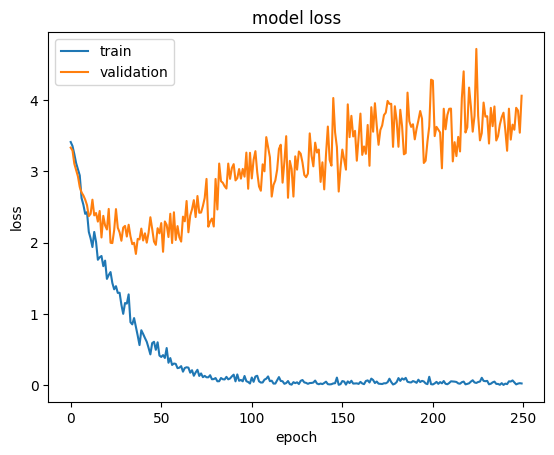

In [ ]:
import matplotlib.pyplot as plt

# Save Train result
fig2 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

fig2.savefig(local_path + 'loss01.jpg')

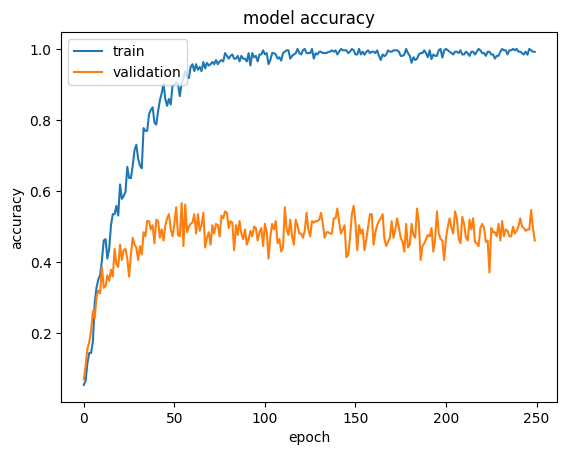

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

fig1.savefig(local_path + 'accuracy01.jpg')

In [ ]:
# Save Weight
save_dir = '/content/drive/MyDrive/1 - Matrikulasi Pemrograman Python/'
model.save(save_dir + 'model01.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
